# Notebook combining plots for paper

### Common imports

In [1]:
# annoying future warning from seaborn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import importlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

import diffvert
import diffvert.models.NDIVE

import diffvert.evaluation.plot_helpers as ph
import diffvert.utils.data_format as daf
from functools import partial
import seaborn as sns
import mpl_toolkits.axisartist as axisartist

/gpfs/slac/atlas/fs1/d/recsmith/mambaforge/envs/diffvert-js/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
importlib.reload(diffvert.evaluation.plot_helpers)
import diffvert.evaluation.plot_helpers as ph

## Final models
[x] NDIVE

[x] Vertex fit with no track selection

[x] Vertex fit with perfect track selection

[x] FTAG

[x] FTAG + NDIVE

[x] FTAG + Fit with Ideal Track Selection

In [4]:
#%env NDIVE_MODEL_PATH=/gpfs/slac/atlas/fs1/d/jshoe/saved_models/
%env NDIVE_MODEL_PATH=/gpfs/slac/atlas/fs1/d/recsmith/Vertexing/saved_models/

env: NDIVE_MODEL_PATH=/gpfs/slac/atlas/fs1/d/recsmith/Vertexing/saved_models/


In [5]:
""" Load in models. """

# Jonathan's models
#ftag_ndive_outs = ph.get_test_output("ftag_all_loss", None, 0)
#ndive_outs = ph.get_test_output("ndive_only", 200)
#ftag_base_outs =  ph.get_test_output("ftag_base_one", None, 0)
#ftag_ndive_outs_mult = ph.get_test_output_list(["ftag_all_loss"]*5, model_numbers=[0,1,2,3,4])
#ftag_base_outs_mult = ph.get_test_output_list(["ftag_base_one"]*5, model_numbers=[0,1,2,3,4])
#ftag_perfect_weights = ph.get_test_output("ftag_true_weights")

# Rachel's final models
# For each model, specify (or leave at None) epoch and model number

ftag_base_outs =  ph.get_test_output("final_ftag_base", None, 0)
ftag_ndive_outs = ph.get_test_output("final_ftag_ndive", None, 0)

ndive_outs = ph.get_test_output("final_ndive_only")
ndive_nots_outs = ph.get_test_output("final_ndive_only_no_track_selection")
ndive_pfts_outs = ph.get_test_output("final_ndive_only_pf_track_selection")

ftag_ndive_pfts_outs = ph.get_test_output_list(["final_ftag_ndive_pf_track_selection"]*5, model_numbers=[0,1,2,3,4], ignore_saved_file=False)

final_ftag_base = ph.get_test_output_list(["final_ftag_base"]*5, model_numbers=[0,1,2,3,4], ignore_saved_file=False)
final_ftag_ndive = ph.get_test_output_list(["final_ftag_ndive"]*5, model_numbers=[0,1,2,3,4], ignore_saved_file=False)


found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs


### Common configs

In [6]:
MAX_NUM_TRACKS = 15
MODEL_INPUT_SHAPE = [10,MAX_NUM_TRACKS,51]
INCLUDE_GHOST = False

In [7]:
#plt.rcParams["font.size"]=15
plt.rcParams['font.size'] = 17
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
threshold=0.5
fc=0.05
efficiency_lower_bound=0.6

In [8]:
purity_color="#EE3377"
efficiency_color="black"
bjet_color="#009988"
cjet_color="#33BBEE"
ujet_color="#EE3377"

## Track selection

In [9]:
def get_n_trks(inputs,mask=False):
    """ get number of tracks by jet """ 
    if mask: 
        mask = np.sum(abs(inputs[:,:,daf.JetData.TRACK_PROD_VTX_Z] \
                         - np.repeat(inputs[:,0,daf.JetData.HADRON_Z],15,axis=0).reshape(60000,15))<1e-3 ,axis=1)
        return inputs[mask>=2][:,0,daf.JetData.N_TRACKS]
    return inputs[:,0,daf.JetData.N_TRACKS]

def get_jet_pt(inputs,mask=False):
    """ get pt by jet """ 
    if mask: 
        mask = np.sum(abs(inputs[:,:,daf.JetData.TRACK_PROD_VTX_Z] \
                         - np.repeat(inputs[:,0,daf.JetData.HADRON_Z],15,axis=0).reshape(60000,15))<1e-3 ,axis=1)
        return inputs[mask>=2][:,0,daf.JetData.TRACK_JET_PT]
    return inputs[:,0,daf.JetData.TRACK_JET_PT]

def get_lxy(inputs,mask=False):
    """ get decay length jet-wise """ 
    if mask: 
        mask = np.sum(abs(inputs[:,:,daf.JetData.TRACK_PROD_VTX_Z] \
                         - np.repeat(inputs[:,0,daf.JetData.HADRON_Z],15,axis=0).reshape(60000,15))<1e-3 ,axis=1)
        return np.sqrt(np.square(inputs[mask>=2][:,0,daf.JetData.HADRON_X])
                   +np.square(inputs[mask>=2][:,0,daf.JetData.HADRON_Y])
                   +np.square(inputs[mask>=2][:,0,daf.JetData.HADRON_Z]))
    return np.sqrt(np.square(inputs[:,0,daf.JetData.HADRON_X])
                   +np.square(inputs[:,0,daf.JetData.HADRON_Y])
                   +np.square(inputs[:,0,daf.JetData.HADRON_Z]))

### Efficiency and purity plots

#### NDIVE

In [10]:
k, n = (ph.get_ratio_true_pos_true_mod(ndive_outs['b_output_arr'],ndive_outs['b_input_arr'], threshold=0.5, has_ghost=False))
print(np.nanmean(k / n))


 Calculating Efficiency...
num should be shape: min: 0, max: 14
  nan count in efficiency calculation: 1890 -> 3.15%
 --- Num jets without tracks from decay: 1890
0.5219132914925377


/sdf/home/r/recsmith/Vertexing/final/ines/Differentiable-Vertexing-Project/diffvert/evaluation/plot_helpers.py:561: RuntimeWarning: invalid value encountered in divide
  percent_correct = k / N
/tmp/ipykernel_57709/3875545624.py:2: RuntimeWarning: invalid value encountered in divide
  print(np.nanmean(k / n))


In [11]:
k, n = (ph.get_ratio_true_pos_true_mod(final_ftag_ndive[0]['b_output_arr'],final_ftag_ndive[0]['b_input_arr'], threshold=0.5, has_ghost=False))
print(np.nanmean(k / n))


 Calculating Efficiency...
num should be shape: min: 0, max: 14
  nan count in efficiency calculation: 1890 -> 3.15%
 --- Num jets without tracks from decay: 1890
0.5217831242831242


/tmp/ipykernel_57709/3664785014.py:2: RuntimeWarning: invalid value encountered in divide
  print(np.nanmean(k / n))


In [12]:
k, n = (ph.get_ratio_true_pos_true_mod(ndive_outs['c_output_arr'],ndive_outs['c_input_arr'], threshold=0.5, has_ghost=False))
print(np.nanmean(k / n))


 Calculating Efficiency...
num should be shape: min: 0, max: 15
  nan count in efficiency calculation: 8285 -> 13.81%
 --- Num jets without tracks from decay: 8285
0.5732581259019429


/tmp/ipykernel_57709/3028054144.py:2: RuntimeWarning: invalid value encountered in divide
  print(np.nanmean(k / n))


In [13]:
k, n = (ph.get_ratio_true_pos_true_mod(final_ftag_ndive[0]['c_output_arr'],final_ftag_ndive[0]['c_input_arr'], threshold=0.5, has_ghost=False))
print(np.nanmean(k / n))


 Calculating Efficiency...
num should be shape: min: 0, max: 15
  nan count in efficiency calculation: 8285 -> 13.81%
 --- Num jets without tracks from decay: 8285
0.6599598951866185


/tmp/ipykernel_57709/494442994.py:2: RuntimeWarning: invalid value encountered in divide
  print(np.nanmean(k / n))



 Calculating Efficiency...
num should be shape: min: 0, max: 14
  nan count in efficiency calculation: 1890 -> 3.15%
 --- Num jets without tracks from decay: 1890
Using std prescription


/sdf/home/r/recsmith/Vertexing/final/ines/Differentiable-Vertexing-Project/diffvert/evaluation/plot_helpers.py:384: RuntimeWarning: invalid value encountered in scalar divide
  eff = k/N
/sdf/home/r/recsmith/Vertexing/final/ines/Differentiable-Vertexing-Project/diffvert/evaluation/plot_helpers.py:656: RuntimeWarning: divide by zero encountered in divide
  err_do = np.divide(1,N)*np.sqrt(k*(1-(np.divide(k,N))))
/sdf/home/r/recsmith/Vertexing/final/ines/Differentiable-Vertexing-Project/diffvert/evaluation/plot_helpers.py:656: RuntimeWarning: invalid value encountered in divide
  err_do = np.divide(1,N)*np.sqrt(k*(1-(np.divide(k,N))))
/sdf/home/r/recsmith/Vertexing/final/ines/Differentiable-Vertexing-Project/diffvert/evaluation/plot_helpers.py:409: RuntimeWarning: Mean of empty slice
  ys = [np.nanmean(out_bin) for out_bin in out_bins]
/sdf/home/r/recsmith/Vertexing/final/ines/Differentiable-Vertexing-Project/diffvert/evaluation/plot_helpers.py:411: RuntimeWarning: Mean of empty slice
  y


 Calculating Efficiency...
num should be shape: min: 0, max: 15
  nan count in efficiency calculation: 8285 -> 13.81%
 --- Num jets without tracks from decay: 8285
Using std prescription

 Calculating purity...
  nan count in purity calculation: 0 -> 0.00%
 --- Num no tracks with w > 0.5 (zero count in denominator): 0
Using std prescription

 Calculating purity...
  nan count in purity calculation: 0 -> 0.00%
 --- Num no tracks with w > 0.5 (zero count in denominator): 0
Using std prescription


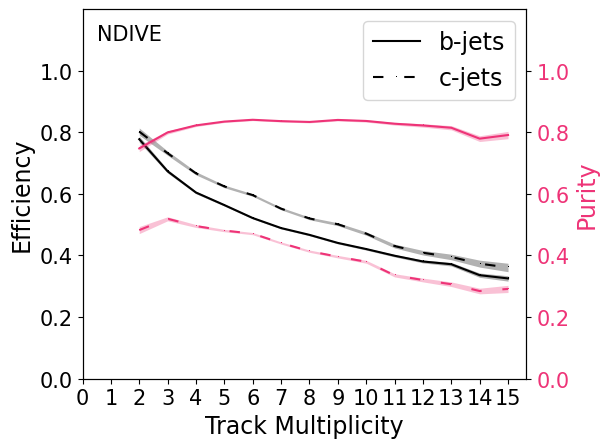

In [14]:
""" NDIVE, track multiplicity """

fig, ax1 = plt.subplots(1)
bins = np.arange(0.5,16,1)
var = "ntrk"

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_true_mod, threshold=threshold),
    get_n_trks,
    ax1,
    #xax,
    bins,
    outs_list=[ndive_outs['b_output_arr']],
    ins_list=[ndive_outs['b_input_arr']],
    #markers=["_"],
    colors=[efficiency_color],
    labels=["b-jets"],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    name_extrafig=None,
    dofillarea=True
)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_true_mod, threshold=threshold),
    get_n_trks,
    ax1,
    #xax,
    bins,
    outs_list=[ndive_outs['c_output_arr']],
    ins_list=[ndive_outs['c_input_arr']],
    labels=["c-jets"],
    #markers=["o"],
    linestyles=[(0, (5, 10))],
    colors=[efficiency_color],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    name_extrafig=None,
    dofillarea=True
)

ax2 = ax1.twinx()

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_pos_mod, threshold=threshold),
    get_n_trks,
    ax2,
    #xax,
    bins,
    outs_list=[ndive_outs['b_output_arr']],
    ins_list=[ndive_outs['b_input_arr']],
    #markers=["_"],
    colors=[purity_color],
    labels=["b-jets"],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    name_extrafig=None,
    dofillarea=True
)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_pos_mod, threshold=threshold),
    get_n_trks,
    ax2,
    #xax,
    bins,
    outs_list=[ndive_outs['c_output_arr']],
    ins_list=[ndive_outs['c_input_arr']],
    labels=["c-jets"],
    #markers=["o"],
    linestyles=[(0, (5, 10))],
    colors=[purity_color],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    name_extrafig=None,
    dofillarea=True
)

ax1.set_xticks(range(16))
ax1.set_xlabel("Track Multiplicity")

ax1.set_ylim([0.0, 1.2])
ax1.set_yticks(np.linspace(0,1,6))
ax1.set_ylabel("Efficiency")
ax2.set_ylabel("Purity", color=purity_color)
ax2.tick_params(axis='y', labelcolor=purity_color)
ax2.set_ylim([0.0, 1.2])
ax2.set_yticks(np.linspace(0,1,6))
plt.text(0.5, 1.1, 'NDIVE', dict(size=15))

fig.tight_layout()
plt.savefig("plots/ndive_eff_purity_ntrack.png")


 Calculating Efficiency...
num should be shape: min: 0, max: 14
  nan count in efficiency calculation: 1890 -> 3.15%
 --- Num jets without tracks from decay: 1890
Using std prescription

 Calculating Efficiency...
num should be shape: min: 0, max: 15
  nan count in efficiency calculation: 8285 -> 13.81%
 --- Num jets without tracks from decay: 8285
Using std prescription

 Calculating purity...
  nan count in purity calculation: 0 -> 0.00%
 --- Num no tracks with w > 0.5 (zero count in denominator): 0
Using std prescription

 Calculating purity...
  nan count in purity calculation: 0 -> 0.00%
 --- Num no tracks with w > 0.5 (zero count in denominator): 0
Using std prescription


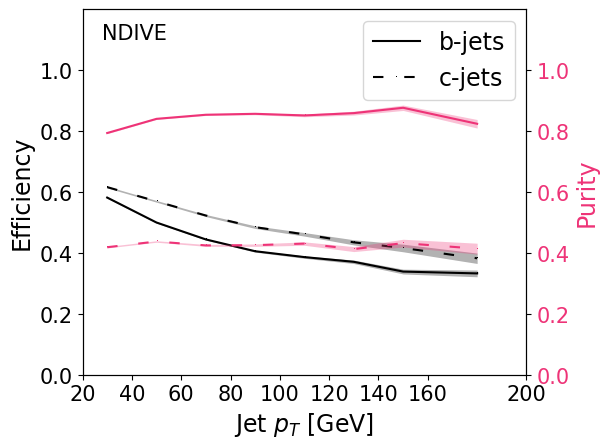

In [15]:
""" NDIVE, jet pt """

fig, ax1 = plt.subplots(1)
bins = [ 20.,  40.,  60.,  80., 100., 120., 140., 160., 200.]#np.linspace(20, 200, 10)
var = "pt"

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_true_mod, threshold=threshold),
    get_jet_pt,
    ax1,
    bins,
    outs_list=[ndive_outs['b_output_arr']],
    ins_list=[ndive_outs['b_input_arr']],
    #markers=["_"],
    colors=[efficiency_color],
    labels=["b-jets"],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    name_extrafig=None,
    dofillarea=True
)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_true_mod, threshold=threshold),
    get_jet_pt,
    ax1,
    bins,
    outs_list=[ndive_outs['c_output_arr']],
    ins_list=[ndive_outs['c_input_arr']],
    labels=["c-jets"],
    #markers=["o"],
    linestyles=[(0, (5, 10))],
    colors=[efficiency_color],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    name_extrafig=None,
    dofillarea=True
)

ax2 = ax1.twinx()

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_pos_mod, threshold=threshold),
    get_jet_pt,
    ax2,
    bins,
    outs_list=[ndive_outs['b_output_arr']],
    ins_list=[ndive_outs['b_input_arr']],
    #markers=["_"],
    colors=[purity_color],
    labels=["b-jets"],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    name_extrafig=None,
    dofillarea=True
)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_pos_mod, threshold=threshold),
    get_jet_pt,
    ax2,
    bins,
    outs_list=[ndive_outs['c_output_arr']],
    ins_list=[ndive_outs['c_input_arr']],
    #markers=["o"],
    labels=["c-jets"],
    linestyles=[(0, (5, 10))],
    colors=[purity_color],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    name_extrafig=None,
    dofillarea=True
)


ax1.set_xlabel('Jet $p_{T}$ [GeV]')

ax1.set_ylim([0.0, 1.2])
ax1.set_yticks(np.linspace(0,1,6))
ax1.set_ylabel("Efficiency")
ax2.set_ylabel("Purity", color=purity_color)
ax2.tick_params(axis='y', labelcolor=purity_color)
ax2.set_ylim([0.0, 1.2])
ax2.set_yticks(np.linspace(0,1,6))
plt.text(28, 1.1, 'NDIVE', dict(size=15))


fig.tight_layout()
plt.savefig("plots/ndive_eff_purity_pt.png")


 Calculating Efficiency...
num should be shape: min: 0, max: 14
  nan count in efficiency calculation: 1890 -> 3.15%
 --- Num jets without tracks from decay: 1890
Using std prescription

 Calculating Efficiency...
num should be shape: min: 0, max: 15
  nan count in efficiency calculation: 8285 -> 13.81%
 --- Num jets without tracks from decay: 8285
Using std prescription

 Calculating purity...
  nan count in purity calculation: 0 -> 0.00%
 --- Num no tracks with w > 0.5 (zero count in denominator): 0
Using std prescription

 Calculating purity...
  nan count in purity calculation: 0 -> 0.00%
 --- Num no tracks with w > 0.5 (zero count in denominator): 0
Using std prescription


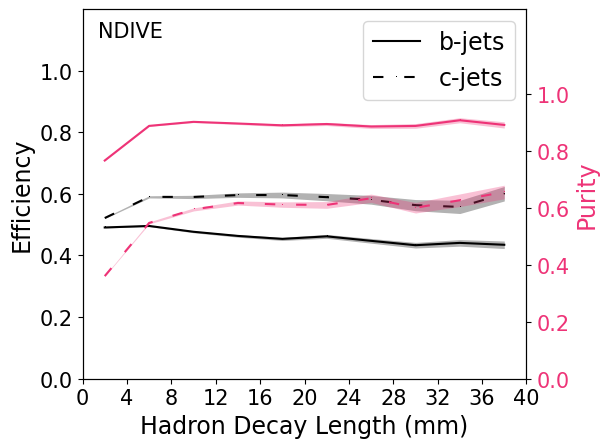

In [16]:
""" NDIVE, hadron length """

fig, ax1 = plt.subplots(1)
bins = np.linspace(0, 40, 11)
var = "lxy"

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_true_mod, threshold=threshold),
    get_lxy,
    ax1,
    bins,
    outs_list=[ndive_outs['b_output_arr']],
    ins_list=[ndive_outs['b_input_arr']],
    colors=[efficiency_color],
    labels=["b-jets"],
    #markers=["_"],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    name_extrafig=None,
    dofillarea=True
)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_true_mod, threshold=threshold),
    get_lxy,
    ax1,
    bins,
    outs_list=[ndive_outs['c_output_arr']],
    ins_list=[ndive_outs['c_input_arr']],
    labels=["c-jets"],
    #markers=["o"],
    linestyles=[(0, (5, 10))],
    colors=[efficiency_color],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    name_extrafig=None,
    dofillarea=True
)

ax2 = ax1.twinx()

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_pos_mod, threshold=threshold),
    get_lxy,
    ax2,
    bins,
    outs_list=[ndive_outs['b_output_arr']],
    ins_list=[ndive_outs['b_input_arr']],
    colors=[purity_color],
    labels=["b-jets"],
    #markers=["_"],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    name_extrafig=None,
    dofillarea=True
)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_pos_mod, threshold=threshold),
    get_lxy,
    ax2,
    bins,
    outs_list=[ndive_outs['c_output_arr']],
    ins_list=[ndive_outs['c_input_arr']],
    #markers=["o"],
    labels=["c-jets"],
    linestyles=[(0, (5, 10))],
    colors=[purity_color],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    name_extrafig=None,
    dofillarea=True
)


ax1.set_xlabel("Hadron Decay Length (mm)")

ax1.set_ylim([0.0, 1.2])
ax1.set_yticks(np.linspace(0,1,6))
ax1.set_ylabel("Efficiency")
ax2.set_ylabel("Purity", color=purity_color)
ax2.tick_params(axis='y', labelcolor=purity_color)
ax2.set_ylim([0.0, 1.3])
ax2.set_yticks(np.linspace(0,1,6))
plt.text(1.35, 1.2, 'NDIVE', dict(size=15))

fig.tight_layout()
plt.savefig("plots/ndive_eff_purity_hadronlength.png")

#### FTAG+NDIVE


 Calculating Efficiency...
num should be shape: min: 0, max: 14
  nan count in efficiency calculation: 1890 -> 3.15%
 --- Num jets without tracks from decay: 1890
Using std prescription

 Calculating Efficiency...
num should be shape: min: 0, max: 15
  nan count in efficiency calculation: 8285 -> 13.81%
 --- Num jets without tracks from decay: 8285
Using std prescription

 Calculating purity...
  nan count in purity calculation: 0 -> 0.00%
 --- Num no tracks with w > 0.5 (zero count in denominator): 0
Using std prescription

 Calculating purity...
  nan count in purity calculation: 0 -> 0.00%
 --- Num no tracks with w > 0.5 (zero count in denominator): 0
Using std prescription


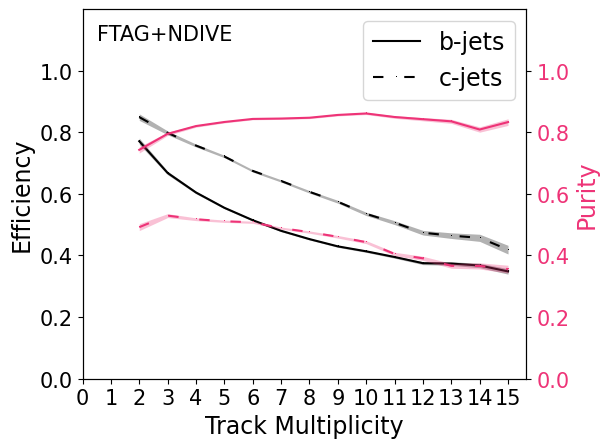

In [17]:
""" FTAG+NDIVE track multiplicity """

fig, ax1 = plt.subplots(1)
bins = np.arange(0.5,16,1)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_true_mod, threshold=threshold),
    get_n_trks,
    ax1,
    bins,
    outs_list=[ftag_ndive_outs['b_output_arr']],
    ins_list=[ftag_ndive_outs['b_input_arr']],
    #markers=["_"],
    colors=[efficiency_color],#['#ff7f0e'],
    labels=["b-jets"],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    dofillarea=True
)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_true_mod, threshold=threshold),
    get_n_trks,
    ax1,
    bins,
    outs_list=[ftag_ndive_outs['c_output_arr']],
    ins_list=[ftag_ndive_outs['c_input_arr']],
    labels=["c-jets"],
    linestyles=[(0, (5, 10))],
    colors=[efficiency_color],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    dofillarea=True
)

ax2 = ax1.twinx()

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_pos_mod, threshold=threshold),
    get_n_trks,
    ax2,
    bins,
    outs_list=[ftag_ndive_outs['b_output_arr']],
    ins_list=[ftag_ndive_outs['b_input_arr']],
    #markers=["_"],
    colors=[purity_color],#['#ff7f0e'],
    labels=["b-jets"],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    dofillarea=True
)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_pos_mod, threshold=threshold),
    get_n_trks,
    ax2,
    bins,
    outs_list=[ftag_ndive_outs['c_output_arr']],
    ins_list=[ftag_ndive_outs['c_input_arr']],
    linestyles=[(0, (5, 10))],
    labels=["c-jets"],
    colors=[purity_color],#['#ff7f0e'],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    dofillarea=True
)


ax1.set_xticks(range(16))
ax1.set_xlabel("Track Multiplicity")

ax1.set_ylim([0.0, 1.2])
ax1.set_yticks(np.linspace(0,1,6))
ax1.set_ylabel("Efficiency")#, color="black")
#ax1.tick_params(axis='y', labelcolor="black")
ax2.set_ylabel("Purity", color=purity_color)
ax2.tick_params(axis='y', labelcolor=purity_color)
ax2.set_ylim([0.0, 1.2])
ax2.set_yticks(np.linspace(0,1,6))
plt.text(0.5, 1.1, 'FTAG+NDIVE', dict(size=15))

fig.tight_layout()
plt.savefig("plots/ftagndive_eff_purity_ntrack.png")


 Calculating Efficiency...
num should be shape: min: 0, max: 14
  nan count in efficiency calculation: 1890 -> 3.15%
 --- Num jets without tracks from decay: 1890
Using std prescription

 Calculating Efficiency...
num should be shape: min: 0, max: 15
  nan count in efficiency calculation: 8285 -> 13.81%
 --- Num jets without tracks from decay: 8285
Using std prescription

 Calculating purity...
  nan count in purity calculation: 0 -> 0.00%
 --- Num no tracks with w > 0.5 (zero count in denominator): 0
Using std prescription

 Calculating purity...
  nan count in purity calculation: 0 -> 0.00%
 --- Num no tracks with w > 0.5 (zero count in denominator): 0
Using std prescription


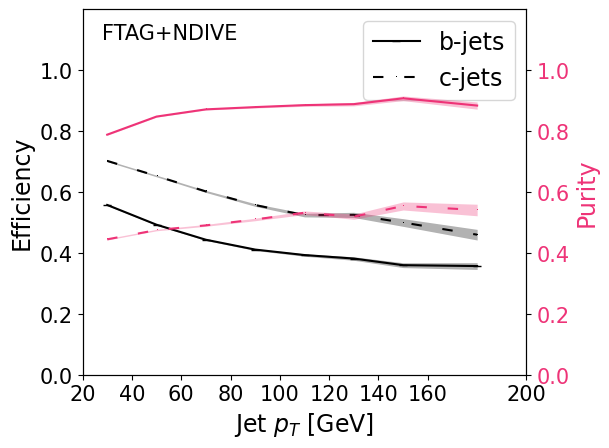

In [18]:
""" FTAG+NDIVE: jet pt """

fig, ax1 = plt.subplots(1)

bins = [ 20.,  40.,  60.,  80., 100., 120., 140., 160., 200.]#np.linspace(20, 200, 10)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_true_mod, threshold=threshold),
    get_jet_pt,
    ax1,
    bins,
    outs_list=[ftag_ndive_outs['b_output_arr']],
    ins_list=[ftag_ndive_outs['b_input_arr']],
    markers=["_"],    
    colors=[efficiency_color],#['#ff7f0e'],
    labels=["b-jets"],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    dofillarea=True
)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_true_mod, threshold=threshold),
    get_jet_pt,
    ax1,
    bins,
    outs_list=[ftag_ndive_outs['c_output_arr']],
    ins_list=[ftag_ndive_outs['c_input_arr']],
    labels=["c-jets"],
    #markers=["o"],
    linestyles=[(0, (5, 10))],
    colors=[efficiency_color],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    dofillarea=True
)

ax2 = ax1.twinx()

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_pos_mod, threshold=threshold),
    get_jet_pt,
    ax2,
    bins,
    outs_list=[ftag_ndive_outs['b_output_arr']],
    ins_list=[ftag_ndive_outs['b_input_arr']],
    #markers=["_"],
    colors=[purity_color],#['#ff7f0e'],
    labels=["b-jets"],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    dofillarea=True
)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_pos_mod, threshold=threshold),
    get_jet_pt,
    ax2,
    bins,
    outs_list=[ftag_ndive_outs['c_output_arr']],
    ins_list=[ftag_ndive_outs['c_input_arr']],
    #markers=["o"],
    linestyles=[(0, (5, 10))],
    labels=["c-jets"],
    colors=[purity_color],#['#ff7f0e'],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    dofillarea=True
)


ax1.set_xlabel('Jet $p_{T}$ [GeV]')

ax1.set_ylim([0.0, 1.2])
ax1.set_yticks(np.linspace(0,1,6))
ax1.set_ylabel("Efficiency")#, color="black")
#ax1.tick_params(axis='y', labelcolor="black")
ax2.set_ylabel("Purity", color=purity_color)
ax2.tick_params(axis='y', labelcolor=purity_color)
ax2.set_ylim([0.0, 1.2])
ax2.set_yticks(np.linspace(0,1,6))
plt.text(28, 1.1, 'FTAG+NDIVE', dict(size=15))


fig.tight_layout()
plt.savefig("plots/ftagndive_eff_purity_pt.png")


 Calculating Efficiency...
num should be shape: min: 0, max: 14
  nan count in efficiency calculation: 1890 -> 3.15%
 --- Num jets without tracks from decay: 1890
Using std prescription

 Calculating Efficiency...
num should be shape: min: 0, max: 15
  nan count in efficiency calculation: 8285 -> 13.81%
 --- Num jets without tracks from decay: 8285
Using std prescription

 Calculating purity...
  nan count in purity calculation: 0 -> 0.00%
 --- Num no tracks with w > 0.5 (zero count in denominator): 0
Using std prescription

 Calculating purity...
  nan count in purity calculation: 0 -> 0.00%
 --- Num no tracks with w > 0.5 (zero count in denominator): 0
Using std prescription


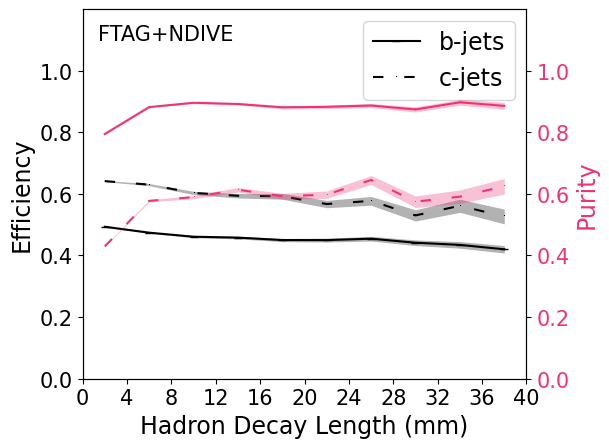

In [19]:
fig, ax1 = plt.subplots(1)
bins = np.linspace(0, 40, 11)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_true_mod, threshold=threshold),
    get_lxy,
    ax1,
    bins,
    outs_list=[ftag_ndive_outs['b_output_arr']],
    ins_list=[ftag_ndive_outs['b_input_arr']],
    markers=["_"],
    colors=[efficiency_color],#['#ff7f0e'],
    labels=["b-jets"],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    dofillarea=True
)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_true_mod, threshold=threshold),
    get_lxy,
    ax1,
    bins,
    outs_list=[ftag_ndive_outs['c_output_arr']],
    ins_list=[ftag_ndive_outs['c_input_arr']],
    labels=["c-jets"],
    #markers=["o"],
    linestyles=[(0, (5, 10))],    
    colors=[efficiency_color],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    dofillarea=True
)

ax2 = ax1.twinx()

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_pos_mod, threshold=threshold),
    get_lxy,
    ax2,
    bins,
    outs_list=[ftag_ndive_outs['b_output_arr']],
    ins_list=[ftag_ndive_outs['b_input_arr']],
    #markers=["_"],    
    colors=[purity_color],#['#ff7f0e'],
    labels=["b-jets"],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    dofillarea=True
)

ph.graph_output_info_vs_input_info(
    partial(ph.get_ratio_true_pos_pos_mod, threshold=threshold),
    get_lxy,
    ax2,
    bins,
    outs_list=[ftag_ndive_outs['c_output_arr']],
    ins_list=[ftag_ndive_outs['c_input_arr']],
    #markers=["o"],
    linestyles=[(0, (5, 10))],    
    labels=["c-jets"],
    colors=[purity_color],#['#ff7f0e'],
    drop_y_err=False,
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    dofillarea=True
)


ax1.set_xlabel("Hadron Decay Length (mm)")

ax1.set_ylim([0.0, 1.2])
ax1.set_yticks(np.linspace(0,1,6))
ax1.set_ylabel("Efficiency")#, color="black")
#ax1.tick_params(axis='y', labelcolor="black")
ax2.set_ylabel("Purity", color=purity_color)
ax2.tick_params(axis='y', labelcolor=purity_color)
ax2.set_ylim([0.0, 1.2])
ax2.set_yticks(np.linspace(0,1,6))
plt.text(1.35, 1.1, 'FTAG+NDIVE', dict(size=15))


fig.tight_layout()
plt.savefig("plots/ftagndive_eff_purity_hadronlength.png")

## Vertex reconstruction

In [20]:
#def get_x_zscore(outputs, inputs, has_ghost=True):
#    """ return z score for vertex x output """
#    return (outputs[:,daf.JetPrediction.VERTEX_X] - inputs[:,0,daf.JetData.HADRON_X]) \
#            / np.sqrt(outputs[:,daf.JetPrediction.VERTEX_COV_XX])

#def get_z_zscore(outputs, inputs, has_ghost=True):
#    """ return z score for vertex z output """
#    return (outputs[:,daf.JetPrediction.VERTEX_Z] - inputs[:,0,daf.JetData.HADRON_Z]) \
#            / np.sqrt(outputs[:,daf.JetPrediction.VERTEX_COV_ZZ])

def get_x_zscore(outputs, inputs, has_ghost=True):
    """ return z score for vertex x output """
    
    mask = np.sum(abs(inputs[:,:,daf.JetData.TRACK_PROD_VTX_Z] \
                         - np.repeat(inputs[:,0,daf.JetData.HADRON_Z],15,axis=0).reshape(60000,15))<1e-3 ,axis=1)
    return (outputs[mask>=2][:,daf.JetPrediction.VERTEX_X] \
            - inputs[mask>=2][:,0,daf.JetData.HADRON_X]) \
            / np.sqrt(outputs[mask>=2][:,daf.JetPrediction.VERTEX_COV_XX])

def get_x_diff(outputs, inputs, has_ghost=True):
    """ return z score for vertex x output """
    
    mask = np.sum(abs(inputs[:,:,daf.JetData.TRACK_PROD_VTX_Z] \
                         - np.repeat(inputs[:,0,daf.JetData.HADRON_Z],15,axis=0).reshape(60000,15))<1e-3 ,axis=1)
    return (outputs[mask>=2][:,daf.JetPrediction.VERTEX_X] \
            - inputs[mask>=2][:,0,daf.JetData.HADRON_X]) 

def get_z_zscore(outputs, inputs, has_ghost=True):
    """ return z score for vertex z output """
    
    mask = np.sum(abs(inputs[:,:,daf.JetData.TRACK_PROD_VTX_Z] \
                         - np.repeat(inputs[:,0,daf.JetData.HADRON_Z],15,axis=0).reshape(60000,15))<1e-3 ,axis=1)
    return (outputs[mask>=2][:,daf.JetPrediction.VERTEX_Z] \
            - inputs[mask>=2][:,0,daf.JetData.HADRON_Z]) \
            / np.sqrt(outputs[mask>=2][:,daf.JetPrediction.VERTEX_COV_ZZ])

def get_z_diff(outputs, inputs, has_ghost=True):
    """ return z score for vertex z output """
    
    mask = np.sum(abs(inputs[:,:,daf.JetData.TRACK_PROD_VTX_Z] \
                         - np.repeat(inputs[:,0,daf.JetData.HADRON_Z],15,axis=0).reshape(60000,15))<1e-3 ,axis=1)
    return (outputs[mask>=2][:,daf.JetPrediction.VERTEX_Z] \
            - inputs[mask>=2][:,0,daf.JetData.HADRON_Z]) 

### Difference 

##### x

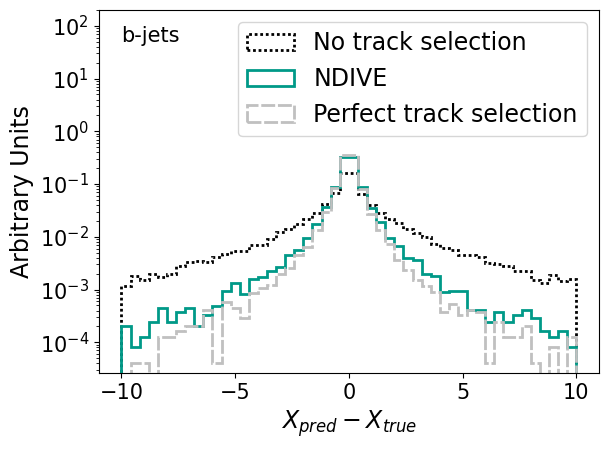

In [21]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2


ph.graph_output_info(
    get_x_diff,
    ax1,
    outs_list=[ndive_nots_outs["b_output_arr"], ndive_outs["b_output_arr"], ndive_pfts_outs["b_output_arr"]],
    ins_list=[ndive_nots_outs["b_input_arr"], ndive_outs["b_input_arr"], ndive_pfts_outs["b_input_arr"]],
    hist_options=hist_options,
    colors=["black",bjet_color,"silver"],
    linestyles=[(0, (1, 1)),"-",(0, (5, 1))],
    labels=["No track selection", "NDIVE", "Perfect track selection"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$X_{pred} - X_{true}$')
ax1.set_ylim(top=200)
plt.text(-10, 50, 'b-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
plt.savefig("plots/ndive_xb_diff.png")

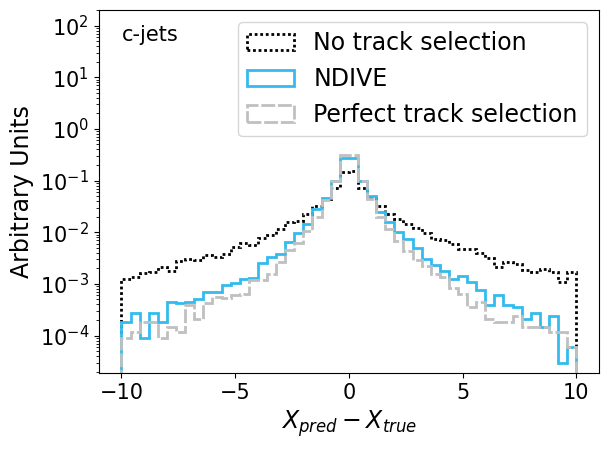

In [22]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2


ph.graph_output_info(
    get_x_diff,
    ax1,
    outs_list=[ndive_nots_outs["c_output_arr"], ndive_outs["c_output_arr"], ndive_pfts_outs["c_output_arr"]],
    ins_list=[ndive_nots_outs["c_input_arr"], ndive_outs["c_input_arr"], ndive_pfts_outs["c_input_arr"]],
    hist_options=hist_options,
    colors=["black",cjet_color,"silver"],
    linestyles=[(0, (1, 1)),"-",(0, (5, 1))],
    labels=["No track selection", "NDIVE", "Perfect track selection"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$X_{pred} - X_{true}$')
ax1.set_ylim(top=200)
plt.text(-10, 50, 'c-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
plt.savefig("plots/ndive_xc_diff.png")

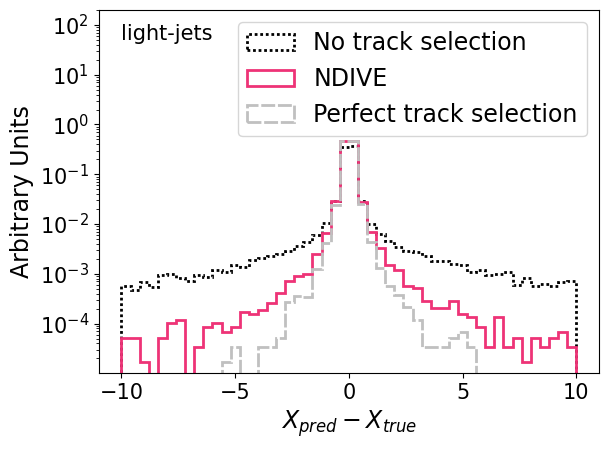

In [23]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2


ph.graph_output_info(
    get_x_diff,
    ax1,
    outs_list=[ndive_nots_outs["u_output_arr"], ndive_outs["u_output_arr"], ndive_pfts_outs["u_output_arr"]],
    ins_list=[ndive_nots_outs["u_input_arr"], ndive_outs["u_input_arr"], ndive_pfts_outs["u_input_arr"]],
    hist_options=hist_options,
    colors=["black",ujet_color,"silver"],
    linestyles=[(0, (1, 1)),"-",(0, (5, 1))],
    labels=["No track selection", "NDIVE", "Perfect track selection"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$X_{pred} - X_{true}$')
ax1.set_ylim(top=200)
plt.text(-10, 50, 'light-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
plt.savefig("plots/ndive_xu_diff.png")

##### z

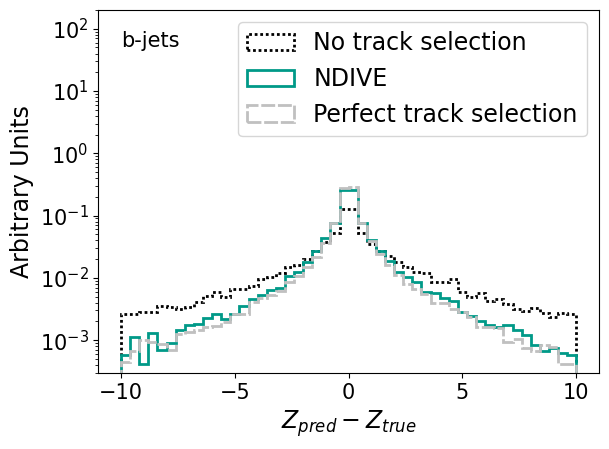

In [24]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2


ph.graph_output_info(
    get_z_diff,
    ax1,
    outs_list=[ndive_nots_outs["b_output_arr"], ndive_outs["b_output_arr"], ndive_pfts_outs["b_output_arr"]],
    ins_list=[ndive_nots_outs["b_input_arr"], ndive_outs["b_input_arr"], ndive_pfts_outs["b_input_arr"]],
    hist_options=hist_options,
    colors=["black",bjet_color,"silver"],
    linestyles=[(0, (1, 1)),"-",(0, (5, 1))],
    labels=["No track selection", "NDIVE", "Perfect track selection"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$Z_{pred} - Z_{true}$')
ax1.set_ylim(top=200)
plt.text(-10, 50, 'b-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
plt.savefig("plots/ndive_zb_diff.png")

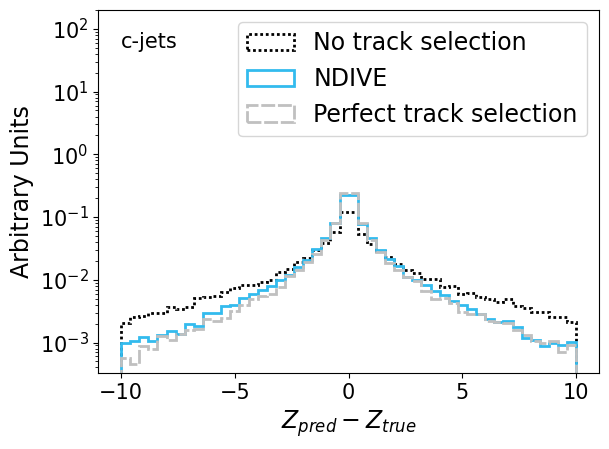

In [25]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2


ph.graph_output_info(
    get_z_diff,
    ax1,
    outs_list=[ndive_nots_outs["c_output_arr"], ndive_outs["c_output_arr"], ndive_pfts_outs["c_output_arr"]],
    ins_list=[ndive_nots_outs["c_input_arr"], ndive_outs["c_input_arr"], ndive_pfts_outs["c_input_arr"]],
    hist_options=hist_options,
    colors=["black",cjet_color,"silver"],
    linestyles=[(0, (1, 1)),"-",(0, (5, 1))],
    labels=["No track selection", "NDIVE", "Perfect track selection"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$Z_{pred} - Z_{true}$')
ax1.set_ylim(top=200)
plt.text(-10, 50, 'c-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
plt.savefig("plots/ndive_zc_diff.png")

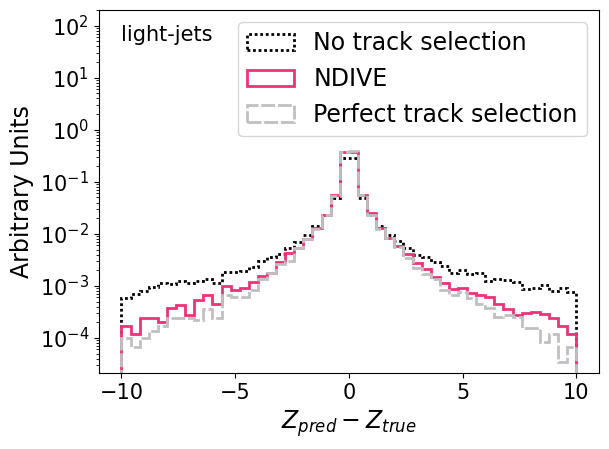

In [26]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2


ph.graph_output_info(
    get_z_diff,
    ax1,
    outs_list=[ndive_nots_outs["u_output_arr"], ndive_outs["u_output_arr"], ndive_pfts_outs["u_output_arr"]],
    ins_list=[ndive_nots_outs["u_input_arr"], ndive_outs["u_input_arr"], ndive_pfts_outs["u_input_arr"]],
    hist_options=hist_options,
    colors=["black",ujet_color,"silver"],
    linestyles=[(0, (1, 1)),"-",(0, (5, 1))],
    labels=["No track selection", "NDIVE", "Perfect track selection"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$Z_{pred} - Z_{true}$')
ax1.set_ylim(top=200)
plt.text(-10, 50, 'light-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
plt.savefig("plots/ndive_zu_diff.png")

### Difference over standard deviation

##### x

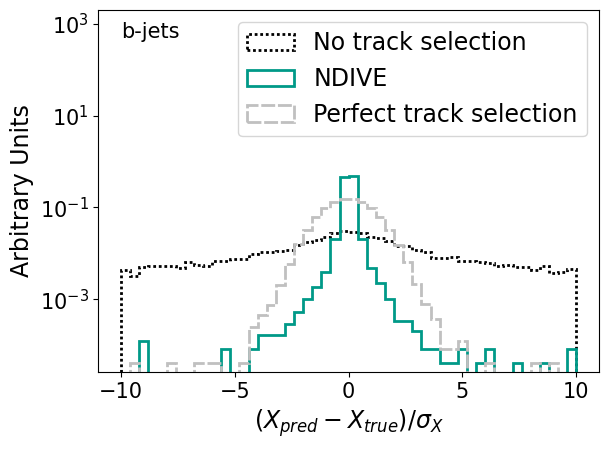

In [27]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2


ph.graph_output_info(
    get_x_zscore,
    ax1,
    outs_list=[ndive_nots_outs["b_output_arr"], ndive_outs["b_output_arr"], ndive_pfts_outs["b_output_arr"]],
    ins_list=[ndive_nots_outs["b_input_arr"], ndive_outs["b_input_arr"], ndive_pfts_outs["b_input_arr"]],
    hist_options=hist_options,
    colors=["black",bjet_color,"silver"],
    linestyles=[(0, (1, 1)),"-",(0, (5, 1))],
    labels=["No track selection", "NDIVE", "Perfect track selection"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$(X_{pred} - X_{true})/\sigma_X$')
ax1.set_ylim(top=2000)
plt.text(-10, 500, 'b-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
plt.savefig("plots/ndive_xb_score.png")

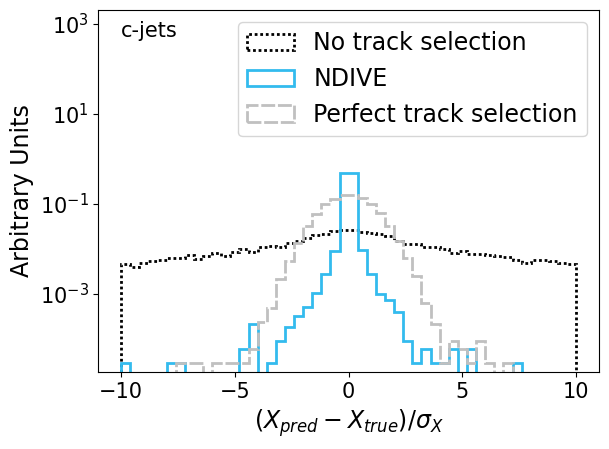

In [28]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2


ph.graph_output_info(
    get_x_zscore,
    ax1,
    outs_list=[ndive_nots_outs["c_output_arr"], ndive_outs["c_output_arr"], ndive_pfts_outs["c_output_arr"]],
    ins_list=[ndive_nots_outs["c_input_arr"], ndive_outs["c_input_arr"], ndive_pfts_outs["c_input_arr"]],
    hist_options=hist_options,
    colors=["black",cjet_color,"silver"],
    linestyles=[(0, (1, 1)),"-",(0, (5, 1))],
    labels=["No track selection", "NDIVE", "Perfect track selection"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$(X_{pred} - X_{true})/\sigma_X$')
ax1.set_ylim(top=2000)
plt.text(-10, 500, 'c-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
plt.savefig("plots/ndive_xc_score.png")

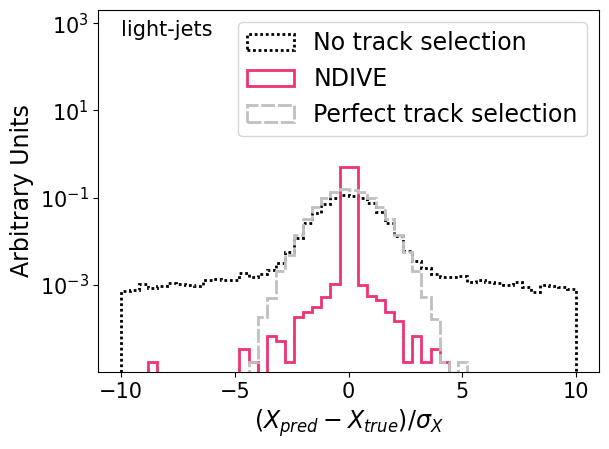

In [29]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2


ph.graph_output_info(
    get_x_zscore,
    ax1,
    outs_list=[ndive_nots_outs["u_output_arr"], ndive_outs["u_output_arr"], ndive_pfts_outs["u_output_arr"]],
    ins_list=[ndive_nots_outs["u_input_arr"], ndive_outs["u_input_arr"], ndive_pfts_outs["u_input_arr"]],
    hist_options=hist_options,
    colors=["black",ujet_color,"silver"],
    linestyles=[(0, (1, 1)),"-",(0, (5, 1))],
    labels=["No track selection", "NDIVE", "Perfect track selection"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$(X_{pred} - X_{true})/\sigma_X$')
ax1.set_ylim(top=2000)
plt.text(-10, 500, 'light-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
plt.savefig("plots/ndive_xu_score.png")

##### z 

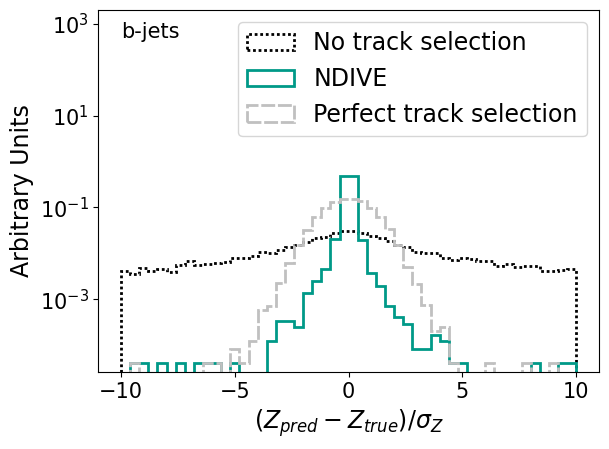

In [30]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2


ph.graph_output_info(
    get_z_zscore,
    ax1,
    outs_list=[ndive_nots_outs["b_output_arr"], ndive_outs["b_output_arr"], ndive_pfts_outs["b_output_arr"]],
    ins_list=[ndive_nots_outs["b_input_arr"], ndive_outs["b_input_arr"], ndive_pfts_outs["b_input_arr"]],
    hist_options=hist_options,
    colors=["black",bjet_color,"silver"],
    linestyles=[(0, (1, 1)),"-",(0, (5, 1))],
    labels=["No track selection", "NDIVE", "Perfect track selection"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$(Z_{pred} - Z_{true})/\sigma_Z$')
ax1.set_ylim(top=2000)
plt.text(-10, 500, 'b-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
plt.savefig("plots/ndive_zb_score.png")

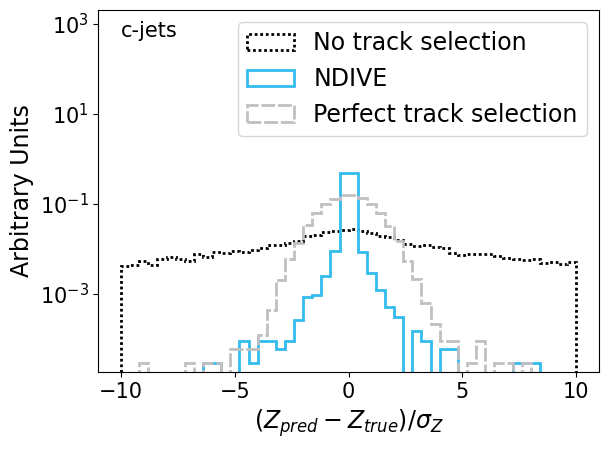

In [31]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2


ph.graph_output_info(
    get_z_zscore,
    ax1,
    outs_list=[ndive_nots_outs["c_output_arr"], ndive_outs["c_output_arr"], ndive_pfts_outs["c_output_arr"]],
    ins_list=[ndive_nots_outs["c_input_arr"], ndive_outs["c_input_arr"], ndive_pfts_outs["c_input_arr"]],
    hist_options=hist_options,
    colors=["black",cjet_color,"silver"],
    linestyles=[(0, (1, 1)),"-",(0, (5, 1))],
    labels=["No track selection", "NDIVE", "Perfect track selection"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$(Z_{pred} - Z_{true})/\sigma_Z$')
ax1.set_ylim(top=2000)
plt.text(-10, 500, 'c-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
plt.savefig("plots/ndive_zc_score.png")

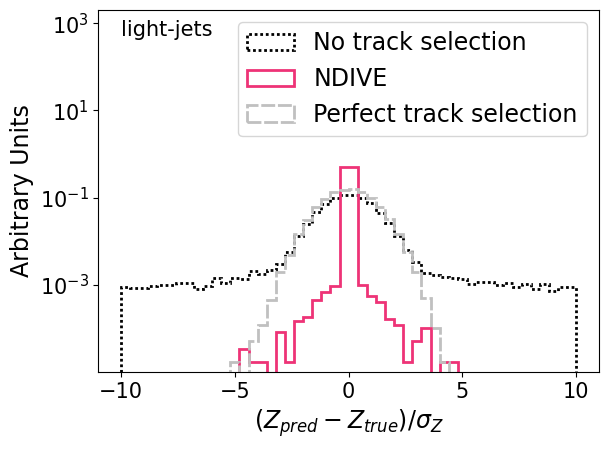

In [32]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2


ph.graph_output_info(
    get_z_zscore,
    ax1,
    outs_list=[ndive_nots_outs["u_output_arr"], ndive_outs["u_output_arr"], ndive_pfts_outs["u_output_arr"]],
    ins_list=[ndive_nots_outs["u_input_arr"], ndive_outs["u_input_arr"], ndive_pfts_outs["u_input_arr"]],
    hist_options=hist_options,
    colors=["black",ujet_color,"silver"],
    linestyles=[(0, (1, 1)),"-",(0, (5, 1))],
    labels=["No track selection", "NDIVE", "Perfect track selection"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$(Z_{pred} - Z_{true})/\sigma_Z$')
ax1.set_ylim(top=2000)
plt.text(-10, 500, 'light-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
plt.savefig("plots/ndive_zu_score.png")

### Difference over standard deviation in bins

In [33]:
importlib.reload(diffvert.evaluation.plot_helpers)
import diffvert.evaluation.plot_helpers as ph

Using std prescription


/gpfs/slac/atlas/fs1/d/recsmith/mambaforge/envs/diffvert-js/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


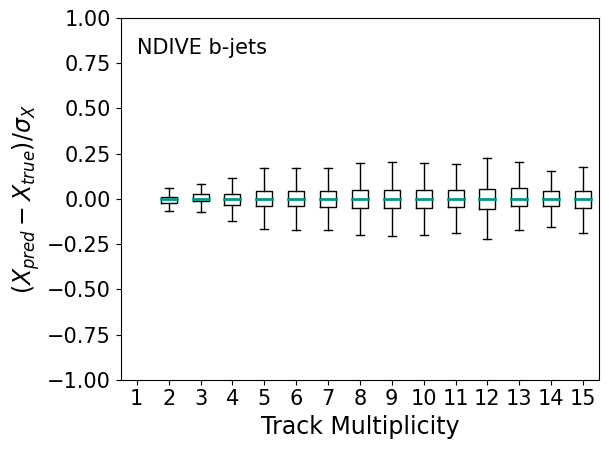

In [34]:
# new model
""" NDIVE, track multiplicity """

fig, ax1 = plt.subplots(1)
bins = np.arange(0.5,16,1)
bin_names = range(1,16)

ph.graph_output_info_vs_input_info(
    partial(get_x_zscore),
    partial(get_n_trks,mask=True),
    ax1,
    bins,
    outs_list=[ndive_outs['b_output_arr']],
    ins_list=[ndive_outs['b_input_arr']],
    colors=[bjet_color],
    labels=["b-jets"],
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    doboxes=True
)

ax1.set_xticks(range(1,16))
ax1.set_ylabel('$(X_{pred} - X_{true})/\sigma_X$')
ax1.set_xlabel("Track Multiplicity")
ax1.set_xticklabels(bin_names)

ax1.set_ylim(-1,1)
plt.text(1, 0.8, 'NDIVE b-jets', dict(size=15))

fig.tight_layout()
plt.savefig("plots/ndive_score_ntrack.png")

Using std prescription


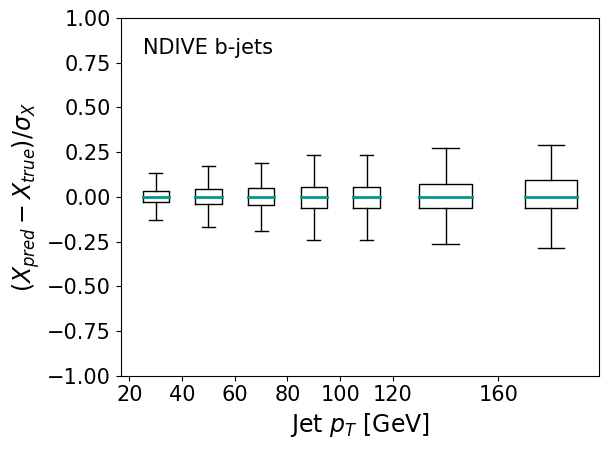

In [35]:
# new model
""" NDIVE, jet pt """

fig, ax1 = plt.subplots(1)
bins = [ 20.,  40.,  60.,  80., 100., 120., 160., 200.]
bin_names = list(map(int,bins[:-1]))

ph.graph_output_info_vs_input_info(
    partial(get_x_zscore),
    partial(get_jet_pt,mask=True),
    ax1,
    bins,
    outs_list=[ndive_outs['b_output_arr']],
    ins_list=[ndive_outs['b_input_arr']],
    labels=["b-jets"],
    colors=[bjet_color],    
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    doboxes=True
)

ax1.set_ylabel('$(X_{pred} - X_{true})/\sigma_X$')
ax1.set_xlabel("Jet $p_{T}$ [GeV]")
ax1.xaxis.set_major_locator(ticker.FixedLocator(bins[:-1]))
ax1.set_xticklabels(bin_names)

ax1.set_ylim(-1,1)
plt.text(25, 0.8, 'NDIVE b-jets', dict(size=15))

fig.tight_layout()
plt.savefig("plots/ndive_score_jetpt.png")

[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40.]
Using std prescription


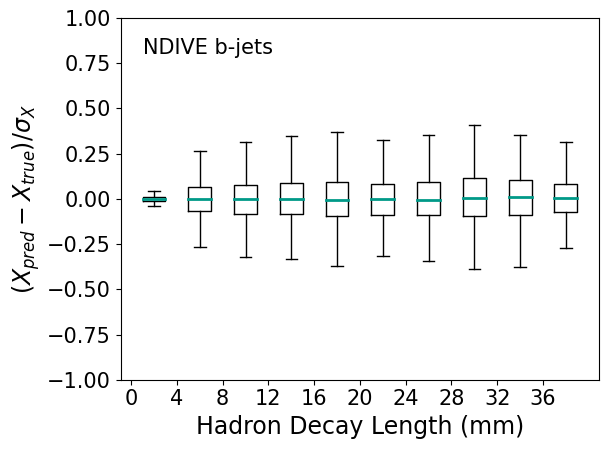

In [36]:
# new model
""" NDIVE, hadron decay length """

fig, ax1 = plt.subplots(1)
bins = np.linspace(0, 40, 11)
print(bins)
bin_names = list(map(int,bins[:-1]))

ph.graph_output_info_vs_input_info(
    partial(get_x_zscore),
    partial(get_lxy,mask=True),
    ax1,
    bins,
    outs_list=[ndive_outs['b_output_arr']],
    ins_list=[ndive_outs['b_input_arr']],
    labels=["b-jets"],
    colors=[bjet_color],    
    has_ghost=INCLUDE_GHOST,
    add_legend=False,
    doboxes=True
)

ax1.set_ylabel('$(X_{pred} - X_{true})/\sigma_X$')
ax1.set_xlabel("Hadron Decay Length (mm)")
ax1.xaxis.set_major_locator(ticker.FixedLocator(bins[:-1]))
ax1.set_xticklabels(bin_names)

ax1.set_ylim(-1,1)
plt.text(1, 0.8, 'NDIVE b-jets', dict(size=15))

fig.tight_layout()
plt.savefig("plots/ndive_score_hadronlength.png")

### 2D plots

In [37]:
from matplotlib import colors

def make_2dhist_vertex_prediction(x_ax, y_ax, z_ax, outputs, inputs, flavor):
    """ Create 2d histogram of predicted coordinate vs true coordinate for x, y, and z."""

    bins = [50,50]
    range = [[-50, 50], [-50, 50]]
    
    h_x, h_y, h_z = None, None, None
    norm=colors.LogNorm(vmin=10e-6, vmax=1)
    #cmap=colors.LinearSegmentedColormap.from_list("", [ujet_color,cjet_color])
    if flavor=="b":
        cmap=colors.LinearSegmentedColormap.from_list("", ['#111A44',ujet_color,'whitesmoke'])
    if flavor=="c":
        cmap=colors.LinearSegmentedColormap.from_list("", ['#111A44',ujet_color,'whitesmoke'])
    #cmap='magma'

    if x_ax is not None: 
        h_x = x_ax.hist2d(inputs[:,0,daf.JetData.HADRON_X], outputs[:,daf.JetPrediction.VERTEX_X], bins=bins, range=range, norm=norm, cmap=cmap, density=True)
    if y_ax is not None: 
        h_y = y_ax.hist2d(inputs[:,0,daf.JetData.HADRON_Y], outputs[:,daf.JetPrediction.VERTEX_Y], bins=bins, range=range, norm=norm, cmap=cmap, density=True)
    if z_ax is not None: 
        h_z = z_ax.hist2d(inputs[:,0,daf.JetData.HADRON_Z], outputs[:,daf.JetPrediction.VERTEX_Z], bins=bins, range=range, norm=norm, cmap=cmap, density=True)

    for ax, dim in zip([x_ax, y_ax, z_ax], ['X', 'Y', 'Z']):
        if ax is None: continue
        ax.set_xlabel(f'${dim}_{{true}}$ [mm]')#, fontsize = 14)
        ax.set_ylabel(f'${dim}_{{pred}}$ [mm]')#, fontsize = 14)

    return h_x, h_y, h_z

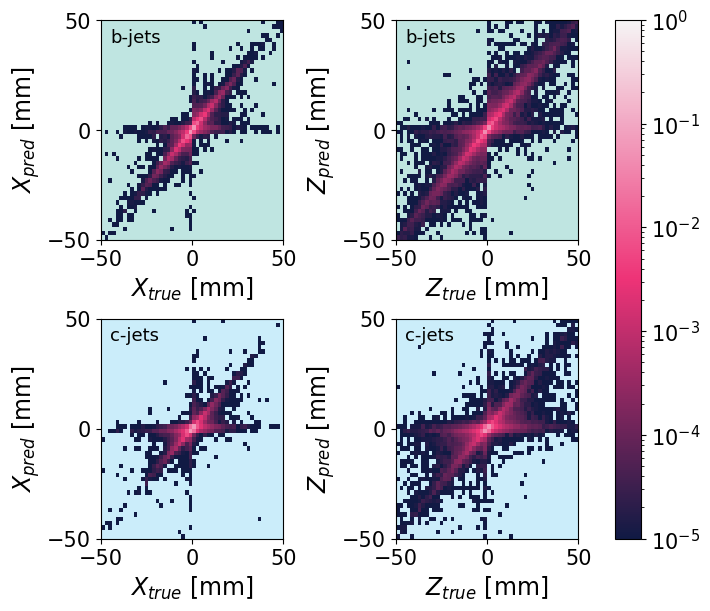

In [38]:
""" show only y,z for paper """
fig, axs = plt.subplots(2, 2, figsize=(7,6), dpi=100, constrained_layout=True)
hxb, _, hzb = make_2dhist_vertex_prediction(axs[0][0], None, axs[0][1], ndive_outs["b_output_arr"], ndive_outs["b_input_arr"],"b")
hxc, _, hzc = make_2dhist_vertex_prediction(axs[1][0], None, axs[1][1], ndive_outs["c_output_arr"], ndive_outs["c_input_arr"],"c")
axs[0][0].text(-45, 40, 'b-jets', dict(size=13))
axs[0][1].text(-45, 40, 'b-jets', dict(size=13))
axs[1][0].text(-45, 40, 'c-jets', dict(size=13))
axs[1][1].text(-45, 40, 'c-jets', dict(size=13))
axs[0][0].set_facecolor(bjet_color)
axs[0][0].patch.set_alpha(0.25)
axs[0][1].set_facecolor(bjet_color)
axs[0][1].patch.set_alpha(0.25)
axs[1][0].set_facecolor(cjet_color)
axs[1][0].patch.set_alpha(0.25)
axs[1][1].set_facecolor(cjet_color)
axs[1][1].patch.set_alpha(0.25)
axs[0][0].set_xticks([-50,0,50])
axs[0][1].set_xticks([-50,0,50])
axs[1][0].set_xticks([-50,0,50])
axs[1][1].set_xticks([-50,0,50])
axs[0][0].set_yticks([-50,0,50])
axs[0][1].set_yticks([-50,0,50])
axs[1][0].set_yticks([-50,0,50])
axs[1][1].set_yticks([-50,0,50])
fig.colorbar(hxb[3], ax=axs.ravel().tolist())
#fig.colorbar(hxb[3], ax=axs[0][1])
#fig.colorbar(hxc[3], ax=axs[1][1])
#fig.tight_layout()
plt.savefig("plots/2Dxz_ndiveonly.png")

## Histogram FTAG discriminant

In [39]:
""" db function definition. Cell must be run before running roc-curves. """
def calculate_db(outputs, inputs=None, fc=0.5, has_ghost=True):
    """ Calculate db value for output set and given fc.

    db is defined as lg(prob(b)/(fc*prob(c)+(1-fc)*prob(u)))
    Method signature satisfies requirements for ph graph_output_info
    """
    numerator = outputs[:,daf.JetPrediction.PROB_B]
    denominator = (1-fc)*outputs[:,daf.JetPrediction.PROB_U] \
                   + fc*outputs[:,daf.JetPrediction.PROB_C]
    return np.log(numerator/denominator)

In [40]:
#""" Graph histogram of db values by true jet flavor """

#fig, ax = plt.subplots(1, figsize=(10,8))
#args=dict(bins=np.linspace(-5,8,50))
#args.update(linewidth=2)
#ph.graph_output_info_dict(partial(calculate_db,fc=fc), ax, ftag_ndive_outs, plot_avgs=False, hist_options=args, labels=["b-jets: FTAG + NDIVE","c-jets: FTAG + NDIVE","light-jets: FTAG + NDIVE"])

#ph.graph_output_info_dict(partial(calculate_db,fc=fc), ax, ftag_base_outs, plot_avgs=False, hist_options=args, labels=["b-jets: FTAG","c-jets: FTAG","light-jets: FTAG"], linestyles=["dashed","dashed","dashed"])
#ax.set_yscale('log')
#ax.set_ylabel("Arbitrary Units")
#ax.set_xlabel("$D_{b}$")
#fig.savefig("plots/Db.png")

## ROC curves

In [41]:
""" Create ROC curve for multiple trained models. """
def get_cu_rej_list(efficiencies, outs_list, fc=0.5):
    """ Return list of b and c rejections for given list of efficiencies.

    Calculates rejections based on a variety of cut locations. For each efficiency find
    cut which produces b efficiency closest to the given value and calculate corresponding
    c and u rejections (given the cut)
    """
    db_cuts = np.linspace(-6,10,1000)

    c_rejs = []
    u_rejs = []
    for outs in outs_list:
        b_db = calculate_db(outs["b_output_arr"], fc=fc)
        c_db = calculate_db(outs["c_output_arr"], fc=fc)
        u_db = calculate_db(outs["u_output_arr"], fc=fc)

        b_eff = [np.sum(b_db > cut)/len(b_db) for cut in db_cuts]
        c_rej = [len(c_db)/np.sum(c_db > cut) for cut in db_cuts]
        u_rej = [len(u_db)/np.sum(u_db > cut) for cut in db_cuts]

        # now plot c/r urejection vs b_eff. want to go in generic way though so we can compare across algs
        #   for each efficiency find which db cut gave value closest to this efficiency and use that
        #   since db cut step size is small this should be pretty accurate
        c_rej_out = np.array([c_rej[np.argmin(np.abs(b_eff-eff))] for eff in efficiencies])
        u_rej_out = np.array([u_rej[np.argmin(np.abs(b_eff-eff))] for eff in efficiencies])
        c_rejs.append(c_rej_out)
        u_rejs.append(u_rej_out)
    c_rej_avg = np.average(np.stack(c_rejs), axis=0)
    u_rej_avg = np.average(np.stack(u_rejs), axis=0)
    c_rej_std_err = np.std(np.stack(c_rejs), axis=0) 
    u_rej_std_err = np.std(np.stack(u_rejs), axis=0)
    return c_rej_avg, u_rej_avg, c_rej_std_err, u_rej_std_err


def roc_curve_list(
        axtop, axbot, efficiencies, outs_list, baseline_values=None, 
        fc=0.5, colors=[cjet_color, ujet_color], label='', plot_errs=True, args={},
    ):
    """ Plot roc curve for a given output set.
    
    Args:
        axtop: top axis of roc-curve, where basic curve will be displayed
        axbot: bottom axis, where ratio of roc-curves is plotted
        efficiencies: list of efficiencies for curve, acts as x-axis coordinates
        outs: list of output dictionaries, from saved file and ph.get_test_output
        baseline_values: baseline outputs to divide against for roc-curve ratio (bottom plot)
        fc: fc value to use in calculation of db for cuts
        colors: colors for b and u output rejection lines
        label: label for output names (appended to 'c' and 'u')
    """
    c_rej_out, u_rej_out, c_rej_out_std_err, u_rej_out_std_err = get_cu_rej_list(
        efficiencies, outs_list, fc=fc,
    )
    axtop.plot(efficiencies, c_rej_out, **args, color=colors[0], label='c-jet'+label)
    axtop.plot(efficiencies, u_rej_out, **args, color=colors[1], label='light-jet'+label)
    if plot_errs:
        axtop.fill_between(
            efficiencies, c_rej_out-c_rej_out_std_err, c_rej_out+c_rej_out_std_err,
            color=colors[0], alpha=0.2,
        )
        axtop.fill_between(
            efficiencies, u_rej_out-u_rej_out_std_err, u_rej_out+u_rej_out_std_err,
            color=colors[1], alpha=0.2,
        )

    if baseline_values is not None:
        c_rej_baseline, u_rej_baseline, c_rej_base_std_err, u_rej_base_std_err = baseline_values
        axbot.plot(efficiencies, c_rej_out/c_rej_baseline, label='c-jet'+label, **args, color=colors[0])
        axbot.plot(efficiencies, u_rej_out/u_rej_baseline, label='light-jet'+label, **args, color=colors[1])
        tot_c_err = c_rej_out/c_rej_baseline * c_rej_out_std_err/c_rej_out
        tot_u_err = u_rej_out/u_rej_baseline * u_rej_out_std_err/u_rej_out
        c_ratio = c_rej_out/c_rej_baseline
        u_ratio = u_rej_out/u_rej_baseline
        if plot_errs:
            axbot.fill_between(
                efficiencies, c_ratio-tot_c_err, c_ratio+tot_c_err, color=colors[0], alpha=0.2,
            )
            axbot.fill_between(
                efficiencies, u_ratio-tot_u_err, u_ratio+tot_u_err, color=colors[1], alpha=0.2,
            )

/tmp/ipykernel_57709/2360262281.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  c_rej = [len(c_db)/np.sum(c_db > cut) for cut in db_cuts]
/tmp/ipykernel_57709/2360262281.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  u_rej = [len(u_db)/np.sum(u_db > cut) for cut in db_cuts]
/tmp/ipykernel_57709/945591774.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim([0, 1e4])


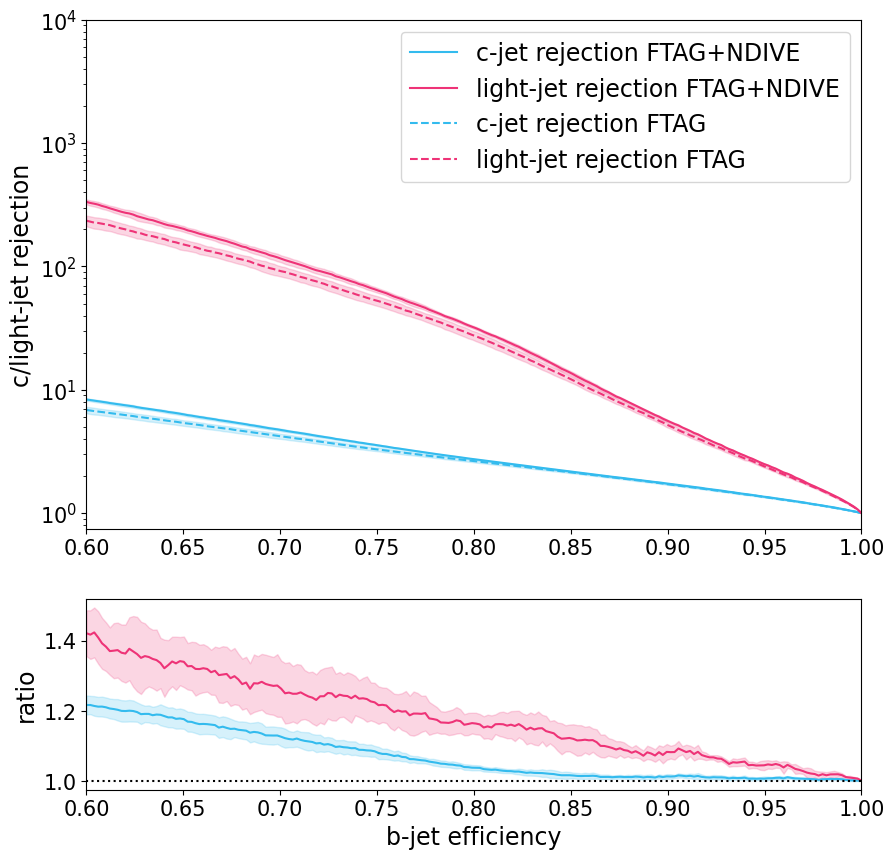

In [42]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10), gridspec_kw={'height_ratios': [4,1.5]}) # was 4,1.5

efficiencies = np.linspace(efficiency_lower_bound,1,200)

baseline_outs = final_ftag_base # BASELINE
baseline_values = get_cu_rej_list(efficiencies, baseline_outs, fc=fc)

roc_curve_list(
    ax1, ax2, efficiencies, final_ftag_ndive, baseline_values=baseline_values,
    fc=fc, args=dict(linestyle='-'), label=' rejection FTAG+NDIVE', plot_errs=True,
)

roc_curve_list(
    ax1, ax2, efficiencies, outs_list=baseline_outs,
    fc=fc, label=' rejection FTAG', plot_errs=True, args=dict(linestyle='--'),
)

ax1.set_yscale('log')
ax1.set_ylabel('c/light-jet rejection')
ax1.set_xlim([efficiency_lower_bound, 1.0])
ax1.set_ylim([0, 1e4])

ax2.axhline(1, color='black', ls=':')
ax2.set_ylabel('ratio')
ax2.set_xlabel('b-jet efficiency')
ax2.set_xlim([efficiency_lower_bound, 1.0])
# ax2.set_ylim([0.9, 1.22])

ax1.legend()
plt.savefig("plots/finalROC.png")

/tmp/ipykernel_57709/2360262281.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  c_rej = [len(c_db)/np.sum(c_db > cut) for cut in db_cuts]
/tmp/ipykernel_57709/2360262281.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  u_rej = [len(u_db)/np.sum(u_db > cut) for cut in db_cuts]
/tmp/ipykernel_57709/4179936192.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim([0, 2e4])


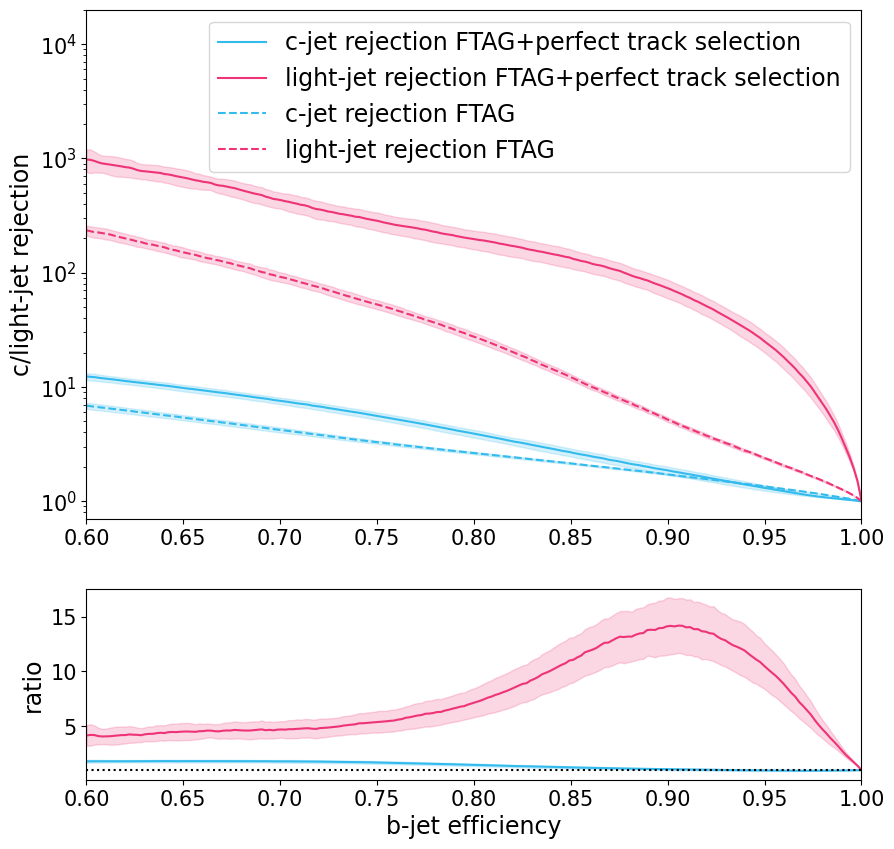

In [43]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10), gridspec_kw={'height_ratios': [4,1.5]}) # was 4,1.5

efficiencies = np.linspace(efficiency_lower_bound,1,200)

baseline_outs = final_ftag_base # BASELINE
baseline_values = get_cu_rej_list(efficiencies, baseline_outs, fc=fc)

roc_curve_list(
    ax1, ax2, efficiencies, ftag_ndive_pfts_outs, baseline_values=baseline_values,
    fc=fc, args=dict(linestyle='-'), label=' rejection FTAG+perfect track selection', plot_errs=True,
)

roc_curve_list(
    ax1, ax2, efficiencies, outs_list=baseline_outs,
    fc=fc, label=' rejection FTAG', plot_errs=True, args=dict(linestyle='--'),
)

ax1.set_yscale('log')
ax1.set_ylabel('c/light-jet rejection')
ax1.set_xlim([efficiency_lower_bound, 1.0])
ax1.set_ylim([0, 2e4])

ax2.axhline(1, color='black', ls=':')
ax2.set_ylabel('ratio')
ax2.set_xlabel('b-jet efficiency')
ax2.set_xlim([efficiency_lower_bound, 1.0])
# ax2.set_ylim([0.9, 1.22])

ax1.legend()
plt.savefig("plots/ROC_perfectweights.png")